<a href="https://colab.research.google.com/github/yumi-jun/Data_Analysis/blob/main/rnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# RNN 구글의 주가를 예측해보자 !
 - 장단기 모델을 사용할 것임!
 - 2012 년 - 2016년 데이터 셋을 통해, 2017년의 주가 를 예측할 것임

## Training set 을 준비해보자

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd



In [ ]:
dataset_train=pd.read_csv('Google_Stock_Price_Train.csv')

## 열을 추출할 때, [:, 1] : Series 1 차원 배열로 반환
## 열을 추출할 때, [:, 1:2] : DataFrame 2차원 배열로 반환
training_set=dataset_train.iloc[:,1:2].values # 1열이 2차원으로 반환
print(training_set)
print(dataset_train.shape)

[[325.25]
 [331.27]
 [329.83]
 ...
 [793.7 ]
 [783.33]
 [782.75]]
(1258, 6)


# 데이터 전처리
- 표준화
- 정규화

시그노이드 함수 : 순환 신경망의 출력층에 활성화 함수에 시그노이드 함수를 사용하게 될 경우, 정규화를 추천한다.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
# 척도
sc=MinMaxScaler(feature_range=(0,1))
# 정규화된 값을 적용한
training_set_scaled=sc.fit_transform(training_set)
print(training_set_scaled)

[[0.08581368]
 [0.09701243]
 [0.09433366]
 ...
 [0.95725128]
 [0.93796041]
 [0.93688146]]


RNN 을 구축하여보자


In [ ]:
x_train=[] # 이전의 60개의 데이터
y_train=[] # 예측할 데이터

for i in range(60,1258):
  # 시리즈 1차원 배열로 반환
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

# 1차원 배열들이, numpy 로 다차원 배열로 변혼하게됨.
# x_train : 0-59 까지의 데이터 배열, y_train : 60 의 데이터가 있음
x_train,y_train=np.array(x_train),np.array(y_train)

In [ ]:
# 3차원 모델 만들
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1], 1))
print(x_train)

[[[0.08581368]
  [0.09701243]
  [0.09433366]
  ...
  [0.07846566]
  [0.08034452]
  [0.08497656]]

 [[0.09701243]
  [0.09433366]
  [0.09156187]
  ...
  [0.08034452]
  [0.08497656]
  [0.08627874]]

 [[0.09433366]
  [0.09156187]
  [0.07984225]
  ...
  [0.08497656]
  [0.08627874]
  [0.08471612]]

 ...

 [[0.92106928]
  [0.92438053]
  [0.93048218]
  ...
  [0.95475854]
  [0.95204256]
  [0.95163331]]

 [[0.92438053]
  [0.93048218]
  [0.9299055 ]
  ...
  [0.95204256]
  [0.95163331]
  [0.95725128]]

 [[0.93048218]
  [0.9299055 ]
  [0.93113327]
  ...
  [0.95163331]
  [0.95725128]
  [0.93796041]]]


In [ ]:
print(x_train.shape)

(1198, 60, 1)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

regressor = Sequential()


In [ ]:
#  LSTM Layer 을 넣는다.
# 드롭 아웃 정규화 : 드롭아웃 비율 20% 떨어트리는,
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))

Epoch 1/100
36/36 [==============================] - 19s 246ms/step - loss: 0.0497
Epoch 2/100
36/36 [==============================] - 11s 316ms/step - loss: 0.0073
Epoch 3/100
36/36 [==============================] - 10s 282ms/step - loss: 0.0062
Epoch 4/100
36/36 [==============================] - 10s 285ms/step - loss: 0.0058
Epoch 5/100
36/36 [==============================] - 9s 254ms/step - loss: 0.0052
Epoch 6/100
36/36 [==============================] - 10s 267ms/step - loss: 0.0055
Epoch 7/100
36/36 [==============================] - 10s 282ms/step - loss: 0.0056
Epoch 8/100
36/36 [==============================] - 11s 294ms/step - loss: 0.0065
Epoch 9/100
36/36 [==============================] - 9s 248ms/step - loss: 0.0052
Epoch 10/100
36/36 [==============================] - 10s 276ms/step - loss: 0.0048
Epoch 11/100
36/36 [==============================] - 10s 283ms/step - loss: 0.0053
Epoch 12/100
36/36 [==============================] - 11s 295ms/step - loss: 0.0044
Epo

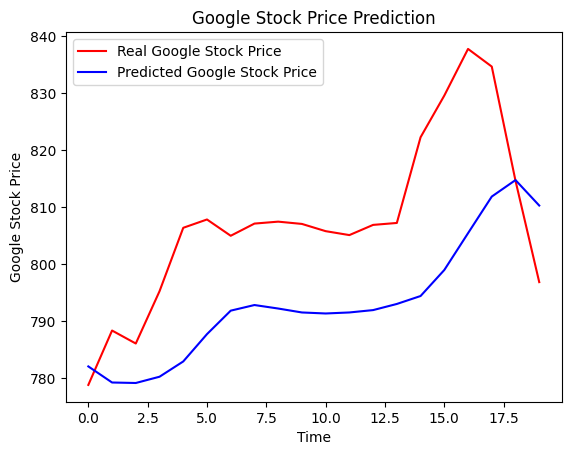

In [125]:
# Recurrent Neural Network



# Part 1 - Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the training set
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values

# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(120, 1258):
    X_train.append(training_set_scaled[i-120:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

# Reshaping
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))



# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))


regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units = 1))

# Compiling the RNN
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
regressor.fit(X_train, y_train, epochs = 100, batch_size = 32)



# Part 3 - Making the predictions and visualising the results

# Getting the real stock price of 2017
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

# Getting the predicted stock price of 2017
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 120:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(120, 140):
    X_test.append(inputs[i-120:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

# Visualising the results
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()